In [27]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
url ='https://courses.openedu.ru/assets/courseware/v1/f2906818eda8fcfc8f8416557ab1e6df/asset-v1:ITMOUniversity+ADVMLEN+spring_2021_ITMO+type@asset+block/diabetes.csv'
df = pd.read_csv(url)
data = df.head(520)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#количество людей юез диабета
len(data[data['Outcome'] == 0])

333

In [5]:
train_data = data.head(int(len(data)*0.8))
test_data = data.tail(int(len(data)*0.2))

In [6]:
#определяем признаки и целевую переменную
features = list(train_data.columns[:8])
x = train_data[features]
y = train_data['Outcome']

In [7]:
tree = DecisionTreeClassifier(criterion='entropy', #splitting criterion
                              min_samples_leaf=15, #minimum number of samples per leaf
                              max_leaf_nodes=25, #maximum number of leaves
                              random_state=2020)
clf=tree.fit(x, y)

In [8]:
#глубина дерева
clf.tree_.max_depth

8

In [9]:
!pip install graphviz

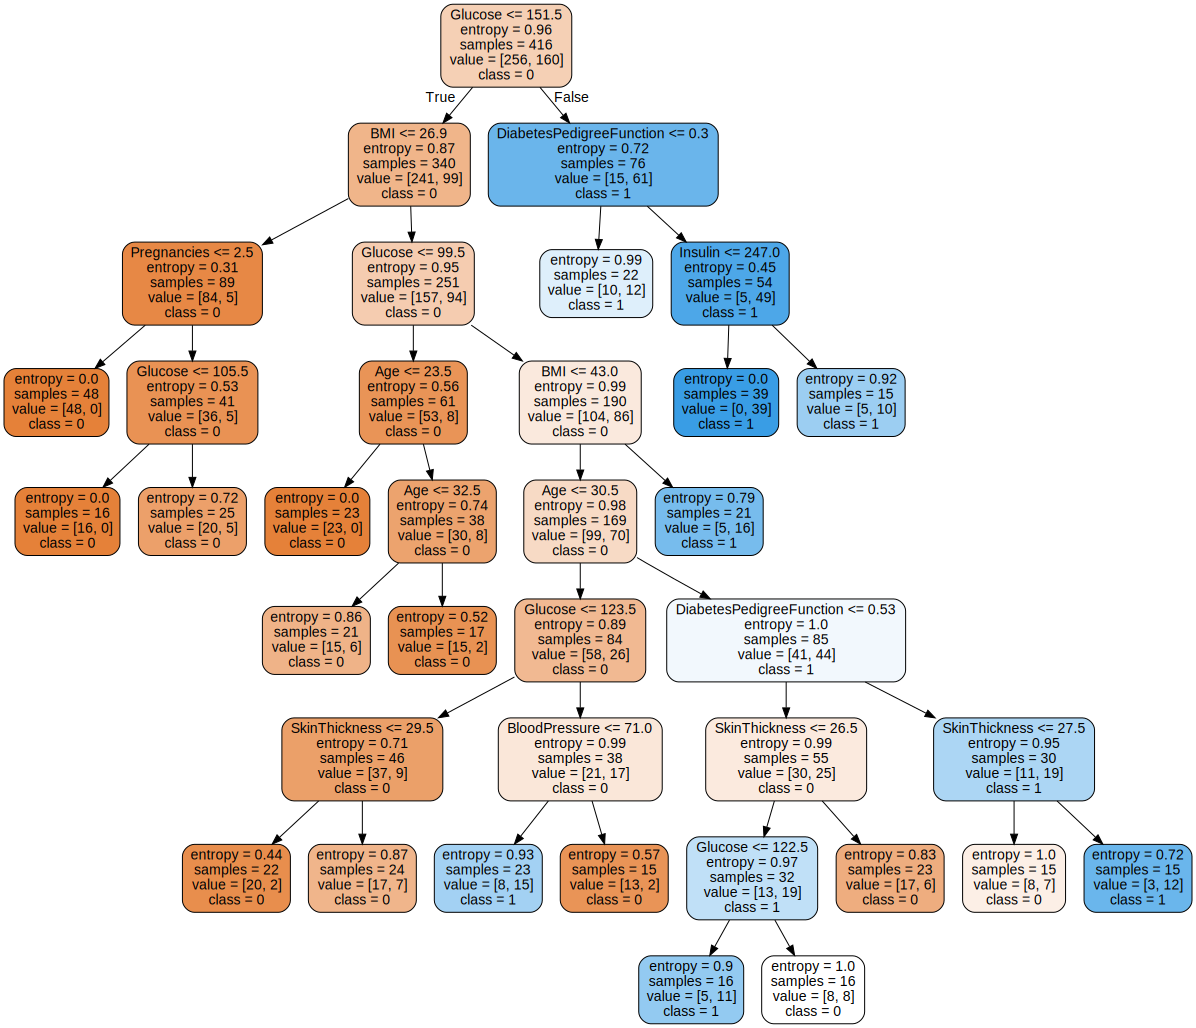

In [10]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                    precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [24]:
features = list(test_data.columns[:8])
x_test = test_data[features]
y_true = test_data['Outcome']
y_pred = clf.predict(x_test)

In [28]:
accuracy = accuracy_score(y_true, y_pred)
f1_score = f1_score(y_true, y_pred, average = 'macro')
print("Accurancy: {0:.2f}\nF1_score: {1:.2f}".format(accuracy, f1_score))

Accurancy: 0.82
F1_score: 0.76


In [49]:
patient_list = [719, 739, 748, 734]
for patient in patient_list:
    print(patient, "\t", clf.predict([df.loc[patient, features].tolist()])[0])

719 	 0
739 	 1
748 	 1
734 	 0
